# <a id="inicio"></a> Exercícios Pré-processamento de Dados

-----

### **Autor:** Glauco Lauria Marques Filho

-----

# <a id="resumo"></a> Resumo 

#### Este arquivo contém a resolução dos exercícios da Aula 2 do curso CEDS-808: Aprendizado de Máquina. 

# <a id="sumario"></a> Sumário


* [Início](#inicio)
* [Resumo](#resumo)
* [Sumário](#sumario)
* [Importação de Requisitos](#requisitos)
1. [Dataset Wine](#datasetwine)
- 1.a. [Análise com Boxplot](#boxplot)
- 1.b. [Normalização](#normalizacao)
- 1.c. [PCA](#pca)
- 1.d. [Correlação](#heatmap)
- 1.e. [Desbalanceamento](#desba)

# <a id="requisitos"></a> Importação de Requisitos

In [38]:
from ucimlrepo import fetch_ucirepo # Biblioteca que possui os dados da base Wine
import pandas as pd # Biblioteca padrão Pandas
import seaborn as sns # Biblioteca de plotagem
import matplotlib.pyplot as plt # Biblioteca de graficos 
from sklearn.decomposition import PCA # Importacao da funcao de PCA

# <a id="datasetwine"></a> 1. Dataset Wine

Utilizando o dataset Wine para o exercício. Importando o dataset da biblioteca, e carregando dataframes de Features e Target.

In [6]:
# Importando o dataset wine
wine = fetch_ucirepo(id=109) 
# Definindo dataframe de Features e target
X = wine.data.features 
y = wine.data.targets

Pritando um pouco dos dataframes para uma primeira exploração da base de dados.

In [23]:
X.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [9]:
y.tail()

,class
173,3
174,3
175,3
176,3
177,3


# <a id="boxplot"></a> 1.a. Análise com Boxplot

Faça um boxplot analisando a média e desvio padrão dos valores de cada feature e se há outliers.

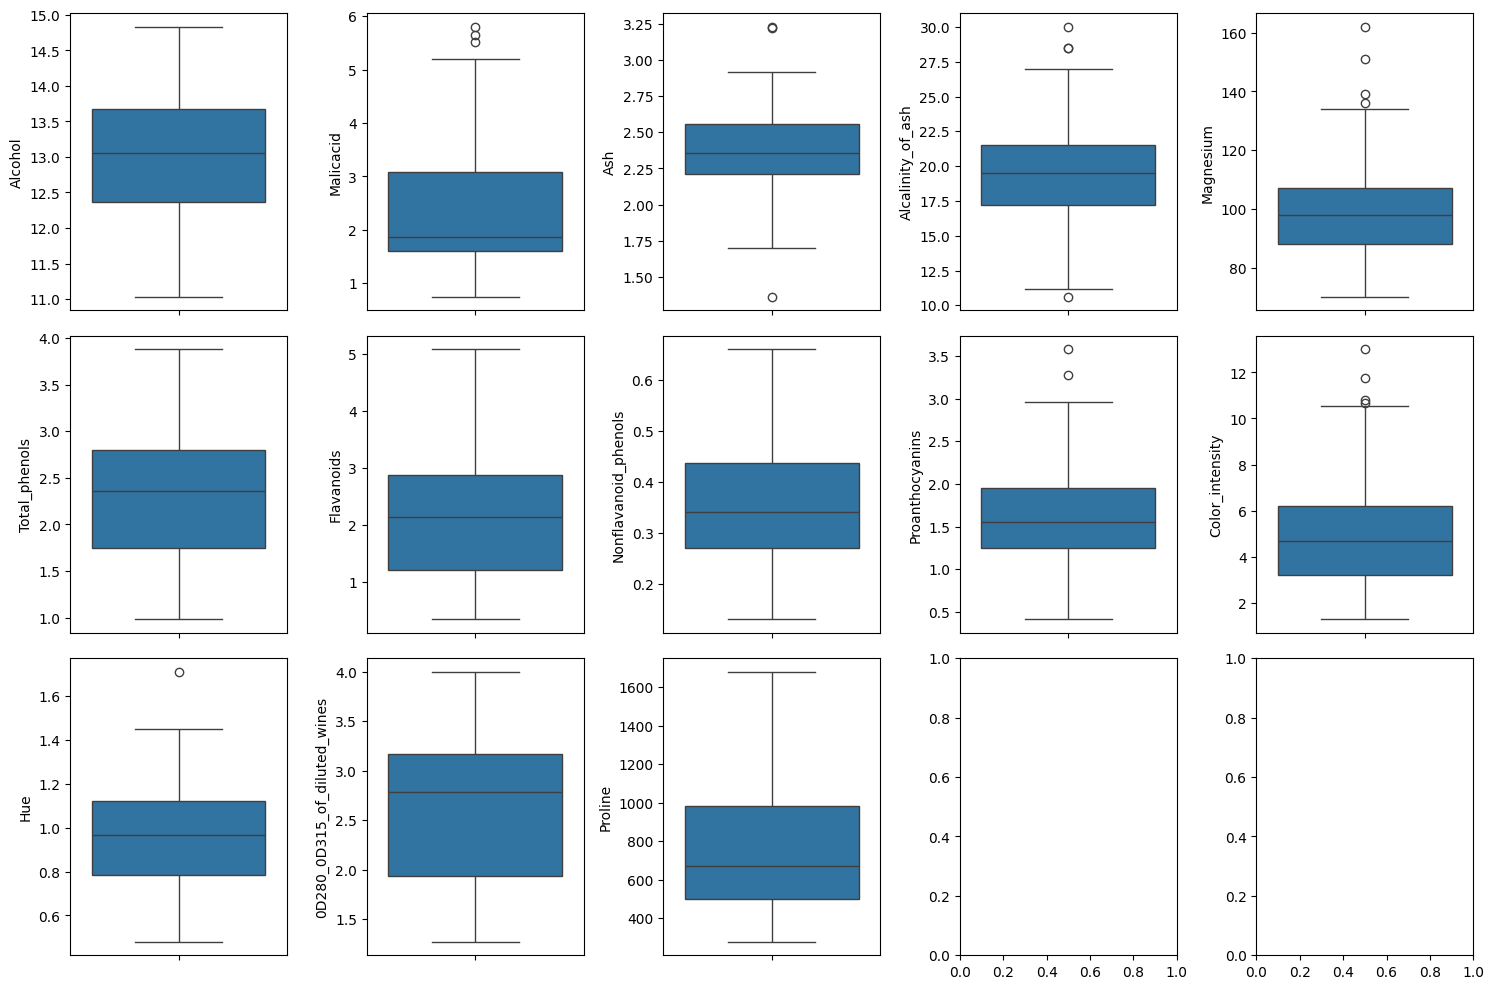

In [28]:
# Cria uma figura com 3 linhas e 5 colunas de subplots
fig, axs = plt.subplots(3, 5, figsize=(15, 10))

# Plotando gráficos diferentes em cada subplot
sns.boxplot(data=X['Alcohol'], ax=axs[0, 0])
sns.boxplot(data=X['Malicacid'], ax=axs[0, 1])
sns.boxplot(data=X['Ash'], ax=axs[0, 2])
sns.boxplot(data=X['Alcalinity_of_ash'], ax=axs[0, 3])
sns.boxplot(data=X['Magnesium'], ax=axs[0, 4])
sns.boxplot(data=X['Total_phenols'], ax=axs[1, 0])
sns.boxplot(data=X['Flavanoids'], ax=axs[1, 1])
sns.boxplot(data=X['Nonflavanoid_phenols'], ax=axs[1, 2])
sns.boxplot(data=X['Proanthocyanins'], ax=axs[1, 3])
sns.boxplot(data=X['Color_intensity'], ax=axs[1, 4])
sns.boxplot(data=X['Hue'], ax=axs[2, 0])
sns.boxplot(data=X['0D280_0D315_of_diluted_wines'], ax=axs[2, 1])
sns.boxplot(data=X['Proline'], ax=axs[2, 2])
plt.tight_layout()

# Mostrar a figura
plt.show()

Com os gráficos plotados podemos observar que há a presença de Outliers em algumas features, as que possuem são:
Malicacid, Ash, Alcalinity_of_ash, Magnesium, Proanthocyanins, Color_intensity e Hue.

O tamanho dos retângulos em azul também nos indica quais medidas possuem um desvio padrão maior ou menor. Quanto menor o retângulo, menor seu desvio padrão. 


# <a id="normalizacao"></a> 1.b. Normalização

Aplique normalização Min-Max Scaling nas features.

Sabemos que a fórmula da normalização de Min-Max é:

$$
X_{\text{norm}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
$$


In [35]:
X_min = X.min() # Valores minimos de cada coluna
X_max = X.max() # Valores maximos de cada coluna
X_norm = (X - X_min) / (X_max - X_min) # Aplicando a normalizacao no dataframe original

Em fim, temos o resultado:

In [36]:
X_norm

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


# <a id="pca"></a> 1.c. PCA

Aplique normalização Min-Max Scaling nas features.

In [40]:
# Aplicando a transformacao conforme mostrado em aula
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_norm)
df_pca = pd.DataFrame(data=principal_components, columns=["Principal Component 1", "Principal Component 2"])
df_pca["Class"] = y

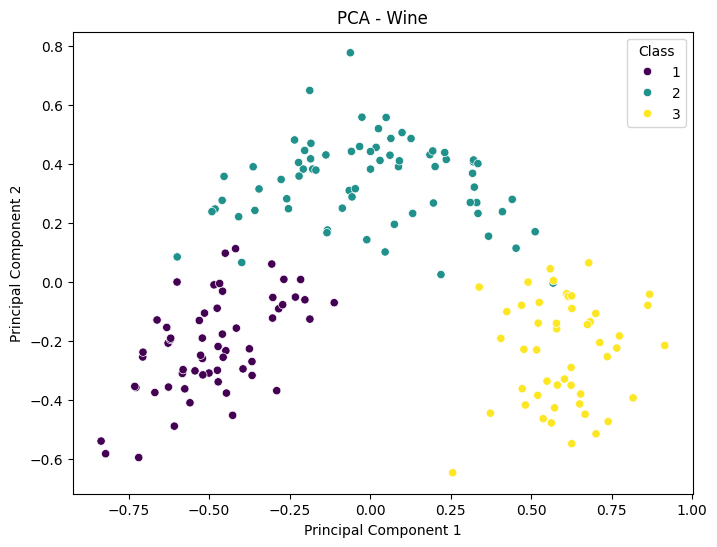

In [42]:
# Plotando o grafico do PCA
plt.figure(figsize=(8,6))
sns.scatterplot(x="Principal Component 1", y="Principal Component 2", hue="Class", data=df_pca, palette="viridis")
plt.title("PCA - Wine")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

Podemos observar com o gráfico que possuímos 3 regiões bem definidas, uma para cada classe de vinho. 

# <a id="heatmap"></a> 1.d. Correlação

Calcule e plote a matriz de correlação entre as features e indique quais atributos tem
maior correlação entre si.

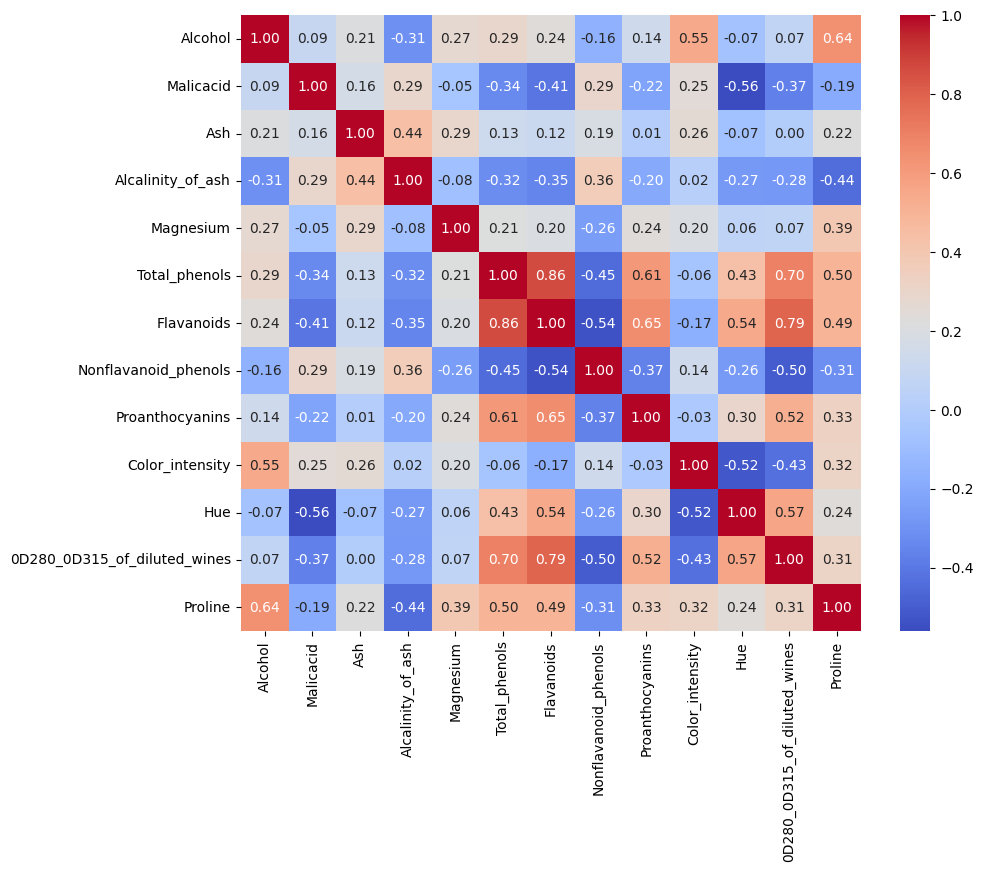

In [44]:
corr = X.corr(method="pearson")
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

Para analisar quais atributos possuem mais correlação vamos considerar os que possuem valores maiores ou igual a 0.7.

Com isso temos maiores correlações entre si para:

* Flavanoids <-> Total_phenols = 0.86
* 0D280_0D315_of_diluted_wines <-> Total_phenols = 0.7
* Flavanoids <-> 0D280_0D315_of_diluted_wines = 0.79

# <a id="desba"></a> 1.e. Desbalanceamento

Verifique se o dataset é desbalanceado.

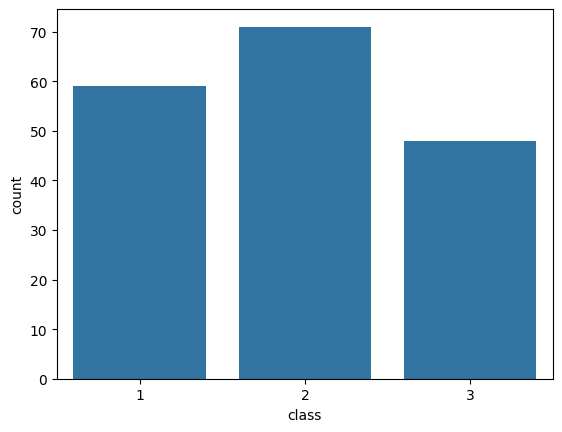

class
2    71
1    59
3    48
Name: count, dtype: int64

In [47]:
sns.countplot(x='class',data=y)
plt.show()

y.value_counts("class")

Temos uma classe minoritária, a classe 3, porém não está com uma grande discrepância no número de aparições.